<a href="https://colab.research.google.com/github/geo-tp/Keras-Colaboratory-Models/blob/main/fashion_mnist_convnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST convnets

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.applications import VGG16

4422102/4422102 [==============================] - 0s 0us/step


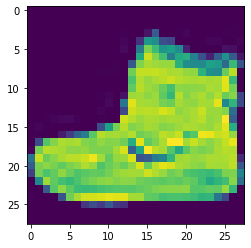

In [2]:
# DATASET & PREPROCESSING - Fashion Mnist
# 60,000 28x28 grayscale images of 10 fashion categories

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Show img example
img = x_train[0]
plt.imshow(img)

# Processing data
x_train = x_train.reshape(60000, 28, 28, 1)
x_train = x_train.astype("float32") / 255
y_train = keras.utils.to_categorical(y_train)

x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test.astype("float32") / 255
y_test = keras.utils.to_categorical(y_test)

# Split for validation set
x_val = x_train[:20000]
y_val = y_train[:20000]
x_train = x_train[20000:]
y_train = y_train[20000:]

In [4]:
# MODEL DEFINITION

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(
    32, (3, 3), 
    activation="relu", 
    input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 256)               1384704   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                        

In [5]:
# TRAINING

epochs = 10
history = model.fit(
    x_train, y_train, 
    validation_data=(x_val, y_val), 
    epochs=epochs, 
    batch_size=64)

Epoch 1/10
625/625 [==============================] - 36s 54ms/step - loss: 0.4505 - accuracy: 0.8404 - val_loss: 0.3126 - val_accuracy: 0.8881
Epoch 2/10
625/625 [==============================] - 33s 52ms/step - loss: 0.2899 - accuracy: 0.8963 - val_loss: 0.2748 - val_accuracy: 0.9017
Epoch 3/10
625/625 [==============================] - 33s 53ms/step - loss: 0.2416 - accuracy: 0.9129 - val_loss: 0.2690 - val_accuracy: 0.9026
Epoch 4/10
625/625 [==============================] - 33s 53ms/step - loss: 0.2094 - accuracy: 0.9248 - val_loss: 0.2548 - val_accuracy: 0.9102
Epoch 5/10
625/625 [==============================] - 32s 51ms/step - loss: 0.1822 - accuracy: 0.9343 - val_loss: 0.2576 - val_accuracy: 0.9111
Epoch 6/10
625/625 [==============================] - 32s 51ms/step - loss: 0.1600 - accuracy: 0.9423 - val_loss: 0.2943 - val_accuracy: 0.8996
Epoch 7/10
625/625 [==============================] - 35s 56ms/step - loss: 0.1436 - accuracy: 0.9487 - val_loss: 0.2658 - val_accuracy:

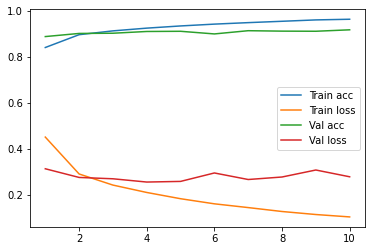

In [6]:
# LOG RESULTS

epochs_range = range(1, epochs + 1)
history_dict = history.history

loss = history_dict['loss']
acc = history_dict['accuracy']

val_loss = history_dict['val_loss']
val_acc = history_dict['val_accuracy']

plt.plot(epochs_range, acc, label="Train acc")
plt.plot(epochs_range, loss, label="Train loss")
plt.plot(epochs_range, val_acc, label="Val acc")
plt.plot(epochs_range, val_loss, label="Val loss")

plt.legend()
plt.show()

In [7]:
# EVALUATION

score = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(score)

313/313 [==============================] - 3s 9ms/step - loss: 0.2936 - accuracy: 0.9172
['loss', 'accuracy']
[0.29364344477653503, 0.9172000288963318]
